In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.ensemble import RandomForestClassifier

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [ ]:
reshaped_mnist = trainX.reshape(60000, 784)

In [ ]:
data = pd.DataFrame(reshaped_mnist)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


In [ ]:
trainy, trainy.shape

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), (60000,))

In [ ]:
y = pd.Series(trainy)
data['target'] = y
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
d1 = data[data['target'] == 2][:100]
d2 = data[data['target'] == 7][:100]
d3 = data[data['target'] == 9][:100]

q2_data = pd.concat([d1, d2, d3])
q2_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
5,0,0,0,0,1,0,0,0,0,22,88,188,172,132,125,141,199,143,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,20,131,199,206,196,202,...,0,0,0,0,0,224,197,123,0,0,0,0,0,0,0,141,151,76,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,133,167,73,0,0,0,2
7,0,0,0,0,0,1,1,0,0,0,0,63,28,0,0,0,33,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,28,126,241,255,...,0,0,0,4,0,103,246,247,72,0,0,0,0,0,1,95,77,52,0,4,0,0,0,0,0,0,0,0,0,0,0,3,0,82,237,231,70,0,0,2
27,0,0,0,1,0,0,0,0,0,70,173,202,169,180,179,182,219,179,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,180,237,248,232,234,...,0,0,0,0,51,248,225,48,0,0,0,0,0,0,38,144,137,0,0,4,2,3,2,2,2,2,2,2,2,2,5,0,14,158,147,0,0,0,0,2
37,0,0,1,1,0,1,0,0,0,0,34,95,0,0,0,0,52,70,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,0,0,11,59,111,113,182,...,1,2,4,8,0,81,134,131,63,0,0,0,0,14,50,33,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,55,59,17,0,0,2
45,0,0,0,1,0,0,0,0,0,34,148,202,107,84,162,198,90,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,107,166,168,152,204,...,144,141,132,0,67,153,142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,78,84,38,62,99,72,45,74,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [ ]:
X = q2_data.drop(columns = ['target'])
Y = q2_data['target']

In [ ]:
Y.shape, X.shape

((300,), (300, 784))

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
pca_X = pca.transform(X)
pca_X.shape

(300, 2)

In [ ]:
pca_X = pd.DataFrame(pca_X)

[]

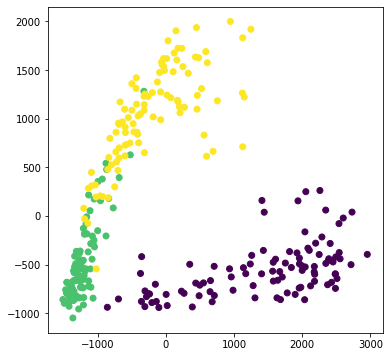

In [ ]:
plt.figure(1, figsize=(6,6))
plt.scatter(pca_X[[0]], pca_X[[1]], c = Y)
plt.plot()

## PCA -> Random Forest

In [ ]:
rnd_clf_pca = RandomForestClassifier()
rnd_clf_pca.fit(pca_X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# T-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

tsne.fit(X)
tsne_X = tsne.fit_transform(X)

In [ ]:
tsne_X = pd.DataFrame(tsne_X)

[]

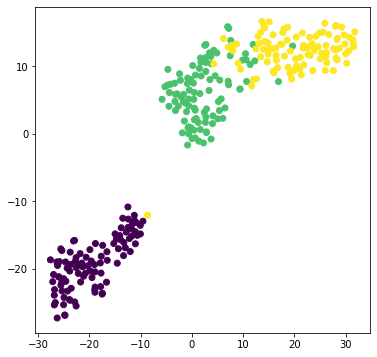

In [ ]:
plt.figure(1, figsize=(6,6))
plt.scatter(tsne_X[[0]], tsne_X[[1]], c = Y)
plt.plot()

## T-SNE -> Random Forest

In [ ]:
rnd_clf_tsne = RandomForestClassifier()
rnd_clf_tsne.fit(tsne_X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# MDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
mda = LinearDiscriminantAnalysis(n_components=2)
mda_X = mda.fit_transform(X, Y)
mda_X = pd.DataFrame(mda_X)

[]

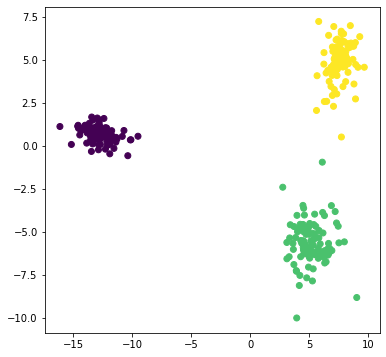

In [ ]:
plt.figure(1, figsize=(6,6))
plt.scatter(mda_X[[0]], mda_X[[1]], c = Y)
plt.plot()

In [ ]:
rnd_clf_mda = RandomForestClassifier()
rnd_clf_mda.fit(mda_X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Accuracies

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
testX.shape

(10000, 28, 28)

In [ ]:
data.shape
reshaped_mnist_test = testX.reshape(10000, 784)
data_test = pd.DataFrame(reshaped_mnist_test)
data_test['target'] = pd.Series(testy)

In [ ]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,13,67,0,0,0,0,50,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,120,209,226,247,...,0,0,0,0,39,249,255,123,0,0,0,0,0,0,0,49,205,197,11,0,4,1,2,2,2,2,2,2,2,2,3,0,3,174,189,67,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,67,177,129,153,117,129,146,141,175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,196,255,...,255,252,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,159,71,0,0,68,176,164,58,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,21,123,108,99,99,84,83,86,92,70,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106,248,230,...,248,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,174,101,0,0,0,146,146,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,2,0,1,1,0,0,0,0,57,67,73,76,76,83,62,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,13,79,128,201,...,174,197,182,162,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,72,95,109,111,111,106,101,71,12,0,0,0,0,0,0,0,0,6


In [ ]:
t1 = data_test[data_test['target'] == 2][:50]
t2 = data_test[data_test['target'] == 7][:50]
t3 = data_test[data_test['target'] == 9][:50]

test_data = pd.concat([t1, t2, t3])

In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
1,0,0,0,0,0,0,0,0,0,0,13,67,0,0,0,0,50,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,120,209,226,247,...,0,0,0,0,39,249,255,123,0,0,0,0,0,0,0,49,205,197,11,0,4,1,2,2,2,2,2,2,2,2,3,0,3,174,189,67,0,0,0,2
16,0,0,0,0,0,0,0,0,0,15,100,132,103,107,113,151,188,176,166,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,201,229,207,...,119,141,138,0,0,31,125,103,85,0,0,0,0,0,75,132,97,0,0,0,0,0,28,37,34,69,72,85,88,47,0,0,0,15,122,113,81,0,0,2
20,0,0,0,0,0,0,0,0,24,173,222,224,206,180,235,175,185,233,233,149,0,0,0,0,0,0,0,0,0,0,0,1,0,0,22,139,242,215,252,229,...,161,154,157,211,30,0,159,145,163,10,0,0,0,2,119,137,82,0,43,162,168,150,148,144,138,140,152,153,134,156,152,167,7,0,107,130,126,0,0,2
46,0,0,0,0,0,0,0,0,0,83,187,100,45,36,26,30,32,124,186,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,133,198,182,183,200,...,210,198,250,157,185,207,195,15,0,0,0,0,0,0,0,66,60,0,61,196,181,195,192,192,193,192,190,188,181,175,157,14,0,56,48,0,0,0,0,2
48,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,70,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,164,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,2,2,0,0,0,0,0,2


In [ ]:
test_X = test_data.drop(columns = ['target'])
test_Y = test_data['target']

## PCA Accurcy

In [ ]:
pca_test_x = pca.transform(test_X)
pca_test_x = pd.DataFrame(pca_test_x)

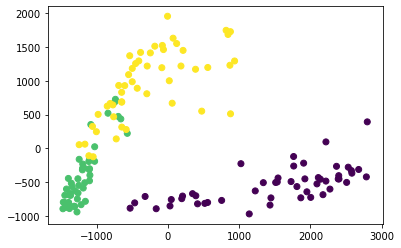

In [ ]:
plt.scatter(pca_test_x[[0]], pca_test_x[[1]], c = test_Y)

In [ ]:
y_pred = rnd_clf_pca.predict(pca_test_x)
accuracy_score(test_Y, y_pred)

0.9133333333333333

## T-SNE Accuracy

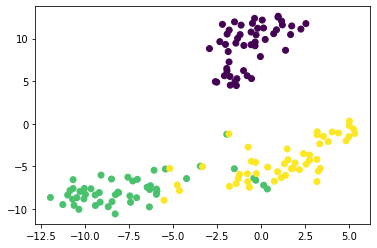

In [ ]:
tsne = TSNE(n_components=2)
tsne_test_x = pd.DataFrame(tsne.fit_transform(test_X))
plt.scatter(tsne_test_x[[0]], tsne_test_x[[1]], c = test_Y)

In [ ]:
y_pred = rnd_clf_tsne.predict(tsne_test_x)
accuracy_score(test_Y, y_pred)

0.12666666666666668

## MDA Accuracy

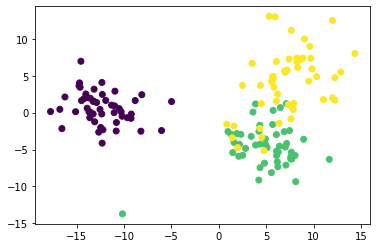

In [ ]:
mda_test_x = pd.DataFrame(mda.transform(test_X))
plt.scatter(mda_test_x[[0]], mda_test_x[[1]], c = test_Y)

In [ ]:
y_pred = rnd_clf_mda.predict(mda_test_x)
accuracy_score(test_Y, y_pred)

0.9